# Project 4MLSP

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

from numpy import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

# Loading Data

In [7]:
df = pd.read_csv("titanic.csv")

# Exploring Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


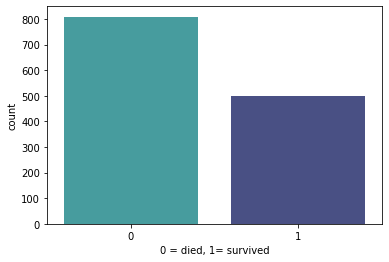

In [6]:
sns.countplot(x='survived', data=df, palette="mako_r")
plt.xlabel("0 = died, 1= survived")
plt.show()

In [8]:
df.shape

(1309, 14)

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
df[df.isnull().any(axis=1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [59]:
len(df.isnull().any(axis=1))

1309

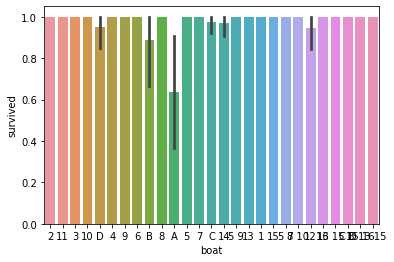

In [61]:
sns.barplot(x='boat', y='survived', data=df)

In [8]:
# many null values and irrelevant data
del df['boat']
del df['body']
del df['cabin']
del df['name']
del df['ticket']

# redundant home/destination with embarked
del df['home.dest']

# ticket price redundant with class
del df['fare']

In [63]:
df[df.isnull().any(axis=1)]

,pclass,survived,sex,age,sibsp,parch,embarked
15,1,0,male,NaN,0,0,S
37,1,1,male,NaN,0,0,S
40,1,0,male,NaN,0,0,C
46,1,0,male,NaN,0,0,S
59,1,1,female,NaN,0,0,C
...,...,...,...,...,...,...,...
1293,3,0,male,NaN,0,0,S
1297,3,0,male,NaN,0,0,S
1302,3,0,male,NaN,0,0,C
1303,3,0,male,NaN,0,0,C


In [30]:
np.mean(df['age'])

29.881137667304014

In [9]:
df = df.fillna({"age": np.mean(df.age)})
df[df.isnull().any(axis=1)]

,pclass,survived,sex,age,sibsp,parch,embarked
168,1,1,female,38.0,0,0,NaN
284,1,1,female,62.0,0,0,NaN


In [36]:
print("Embarked values : {}".format(df.embarked.unique()))

Embarked values : ['S' 'C' nan 'Q']


In [38]:
print("Number of S : {}".format(df.embarked.value_counts()['S']))
print("Number of C : {}".format(df.embarked.value_counts()['C']))
print("Number of Q : {}\n".format(df.embarked.value_counts()['Q']))

Number of S : 914
Number of C : 270
Number of Q : 123



In [10]:
df = df.fillna({"embarked": 'S'})
df[df.isnull().any(axis=1)]

,pclass,survived,sex,age,sibsp,parch,embarked


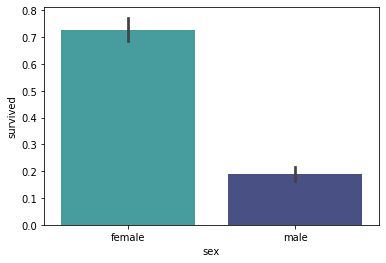

In [67]:
sns.barplot(x='sex', y='survived', data=df, palette="mako_r")

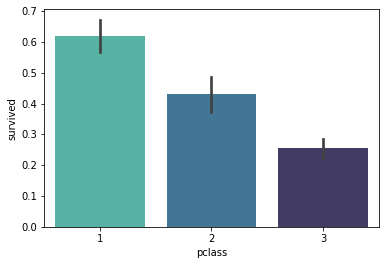

In [68]:
sns.barplot(x='pclass', y='survived', data=df, palette="mako_r")

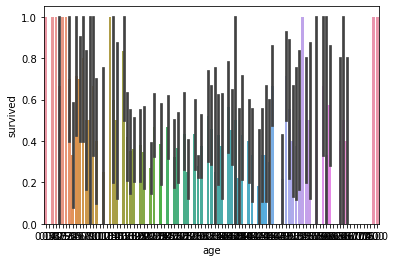

In [54]:
sns.barplot(x='age', y='survived', data=df)

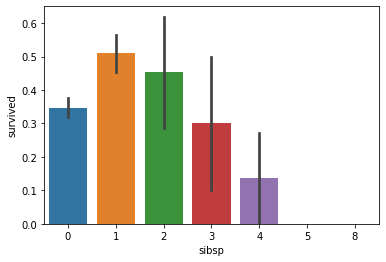

In [70]:
sns.barplot(x='sibsp', y='survived', data=df)

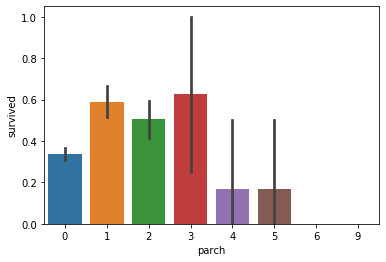

In [57]:
sns.barplot(x='parch', y='survived', data=df)

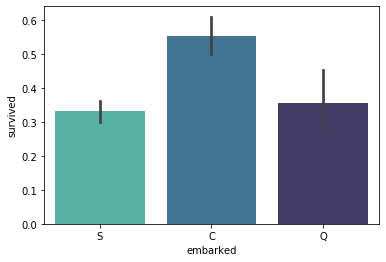

In [71]:
sns.barplot(x='embarked', y='survived', data=df, palette="mako_r")

# Preparing Data

In [11]:
df = pd.get_dummies(df, columns=['sex', 'embarked'])

df.head()

,pclass,survived,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,1,29.00,0,0,1,0,0,0,1
1,1,1,0.92,1,2,0,1,0,0,1
2,1,0,2.00,1,2,1,0,0,0,1
3,1,0,30.00,1,2,0,1,0,0,1
4,1,0,25.00,1,2,1,0,0,0,1


# Splitting Data

In [12]:
# Create the X and y arrays
X = df.drop('survived',axis = 1)
y = df['survived']
del df['survived']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# 70% training and 30% test

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((916, 9), (916,), (393, 9), (393,))

# KNN Classifier

In [13]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [14]:
results = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Accuracy Score :' + str(acc_knn))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[207  17]
 [ 89  80]]
Accuracy Score :0.7302798982188295
Report :
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       224
           1       0.82      0.47      0.60       169

    accuracy                           0.73       393
   macro avg       0.76      0.70      0.70       393
weighted avg       0.75      0.73      0.71       393



# SVM Classifier

In [16]:
#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

In [17]:
results = confusion_matrix(y_test, y_pred)
acc_svm = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Accuracy Score :' + str(acc_svm))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[196  28]
 [ 55 114]]
Accuracy Score :0.7888040712468194
Report :
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       224
           1       0.80      0.67      0.73       169

    accuracy                           0.79       393
   macro avg       0.79      0.77      0.78       393
weighted avg       0.79      0.79      0.79       393



# Linear Discriminant Analysis classifier

In [18]:
#Create a Linear Discriminant Analysis Classifier
lda = LinearDiscriminantAnalysis()

#Train the model using the training sets
lda.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = lda.predict(X_test)

In [19]:
results = confusion_matrix(y_test, y_pred)
acc_ldc = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Accuracy Score :' + str(acc_ldc))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[201  23]
 [ 55 114]]
Accuracy Score :0.8015267175572519
Report :
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       224
           1       0.83      0.67      0.75       169

    accuracy                           0.80       393
   macro avg       0.81      0.79      0.79       393
weighted avg       0.81      0.80      0.80       393



# Logistic Regression classifier

In [20]:
#Instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 10000)

#Train the model using the training sets
logreg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=logreg.predict(X_test)

In [21]:
results = confusion_matrix(y_test, y_pred)
acc_lrc = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Accuracy Score :' + str(acc_lrc))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[202  22]
 [ 57 112]]
Accuracy Score :0.7989821882951654
Report :
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       224
           1       0.84      0.66      0.74       169

    accuracy                           0.80       393
   macro avg       0.81      0.78      0.79       393
weighted avg       0.80      0.80      0.79       393



# Decision Tree classifier

In [22]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

In [23]:
results = confusion_matrix(y_test, y_pred)
acc_decision_tree = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Accuracy Score :' + str(acc_decision_tree))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[188  36]
 [ 61 108]]
Accuracy Score :0.7531806615776081
Report :
              precision    recall  f1-score   support

           0       0.76      0.84      0.79       224
           1       0.75      0.64      0.69       169

    accuracy                           0.75       393
   macro avg       0.75      0.74      0.74       393
weighted avg       0.75      0.75      0.75       393



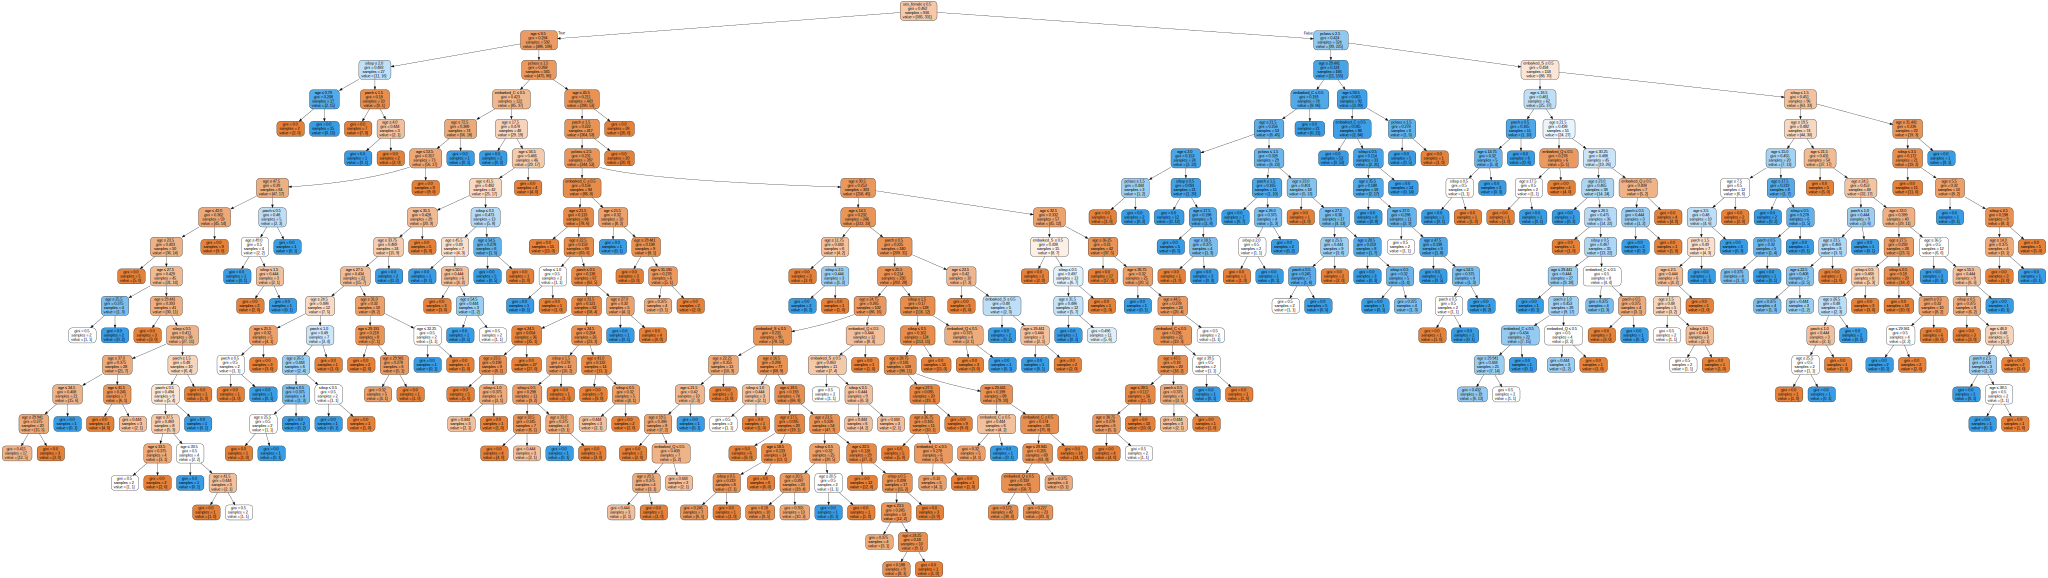

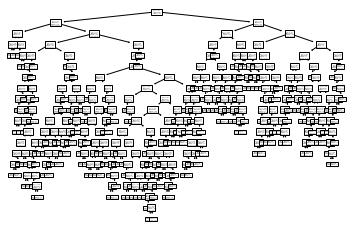

In [116]:
from sklearn import tree
tree.plot_tree(dtc)
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=df.columns , filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("result") 
graph 

# Voting Classifier

In [24]:
# Create a Voting Classifier
vclf = VotingClassifier(estimators=[('KNN', knn), ('SVM', svm_clf), ('LinearDa', lda), ('LogReg', logreg), ('DTree', dtc)], voting='hard')

#Train the model using the training sets y_pred=clf.predict(X_test)
vclf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = vclf.predict(X_test)

In [26]:
results = confusion_matrix(y_test, y_pred)
acc_voting = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Hard Voting Score :' + str(acc_voting))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[201  23]
 [ 57 112]]
Hard Voting Score :0.7964376590330788
Report :
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       224
           1       0.83      0.66      0.74       169

    accuracy                           0.80       393
   macro avg       0.80      0.78      0.79       393
weighted avg       0.80      0.80      0.79       393



# Random Forest Classifier

In [27]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, random_state = random.seed(42))

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [28]:
results = confusion_matrix(y_test, y_pred)
acc_random_forest = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Accuracy Score :' + str(acc_random_forest))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[193  31]
 [ 57 112]]
Accuracy Score :0.7760814249363868
Report :
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       224
           1       0.78      0.66      0.72       169

    accuracy                           0.78       393
   macro avg       0.78      0.76      0.77       393
weighted avg       0.78      0.78      0.77       393



# Gradient Boosting Classifier

In [31]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# 80% training and 20% test

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((1047, 9), (1047,), (262, 9), (262,))

In [32]:
gb_clf2 = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf2.fit(X_train, y_train)

y_pred = gb_clf2.predict(X_test)

In [33]:
results = confusion_matrix(y_test, y_pred)
acc_gb = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Accuracy Score :' + str(acc_gb))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[134  10]
 [ 54  64]]
Accuracy Score :0.7557251908396947
Report :
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       144
           1       0.86      0.54      0.67       118

    accuracy                           0.76       262
   macro avg       0.79      0.74      0.74       262
weighted avg       0.78      0.76      0.74       262



# AdaBoost Classifier

In [29]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [30]:
results = confusion_matrix(y_test, y_pred)
acc_adaboost = accuracy_score(y_test, y_pred)

print('Confusion Matrix : \n' + str(results))
print('Accuracy Score :' + str(acc_adaboost))
print('Report :\n' + str(classification_report(y_test, y_pred)))

Confusion Matrix : 
[[193  31]
 [ 50 119]]
Accuracy Score :0.7938931297709924
Report :
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       224
           1       0.79      0.70      0.75       169

    accuracy                           0.79       393
   macro avg       0.79      0.78      0.79       393
weighted avg       0.79      0.79      0.79       393



In [34]:
models = pd.DataFrame({
    'Model': ['KNN', 'Support Vector Machines', 'Linear Discriminant', 
              'Logistic Regression', 'Decision Tree', 'Voting', 
              'Random Forest', 'Gradient Boosting', 'AdaBoost'],
    'Score': [acc_knn, acc_svm, acc_ldc, 
              acc_lrc, acc_decision_tree, acc_voting, 
              acc_random_forest, acc_gb, acc_adaboost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Linear Discriminant,0.801527
3,Logistic Regression,0.798982
5,Voting,0.796438
8,AdaBoost,0.793893
1,Support Vector Machines,0.788804
6,Random Forest,0.776081
7,Gradient Boosting,0.755725
4,Decision Tree,0.753181
0,KNN,0.730280
